In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Reading the csv file for sunlight_over_year

In [3]:
sunlight_year = pd.read_csv('./data_mart/sunlight_over_year.csv', parse_dates=['date','sunlight'])
sunlight_year

/var/folders/m1/dk0h8kz11p9g8_szsqwqhdnc0000gn/T/ipykernel_12225/4209087351.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sunlight_year = pd.read_csv('./data_mart/sunlight_over_year.csv', parse_dates=['date','sunlight'])


,city,date,sunlight
0,Auckland,2023-04-11,2024-04-16 11:19:00
1,Auckland,2023-04-12,2024-04-16 11:17:00
2,Auckland,2023-04-13,2024-04-16 11:15:00
3,Auckland,2023-04-14,2024-04-16 11:12:00
4,Auckland,2023-04-15,2024-04-16 11:10:00
...,...,...,...
1825,Vancouver,2024-04-06,2024-04-16 13:15:00
1826,Vancouver,2024-04-07,2024-04-16 13:18:00
1827,Vancouver,2024-04-08,2024-04-16 13:22:00
1828,Vancouver,2024-04-09,2024-04-16 13:26:00


In [4]:
sunlight_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   city      1830 non-null   object        
 1   date      1830 non-null   datetime64[ns]
 2   sunlight  1829 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 43.0+ KB


### Separating the data by cities

In [ ]:
# for future reference = try another way with for loop
# for city in sunlight_year['city']
        # using nunique

In [5]:
#separating the data by cities

akl = sunlight_year[sunlight_year['city']=='Auckland']
akl.drop('city', axis=1, inplace=True)

/var/folders/m1/dk0h8kz11p9g8_szsqwqhdnc0000gn/T/ipykernel_12225/2575600788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  akl.drop('city', axis=1, inplace=True)


In [6]:
akl

,date,sunlight
0,2023-04-11,2024-04-16 11:19:00
1,2023-04-12,2024-04-16 11:17:00
2,2023-04-13,2024-04-16 11:15:00
3,2023-04-14,2024-04-16 11:12:00
4,2023-04-15,2024-04-16 11:10:00
...,...,...
361,2024-04-06,2024-04-16 11:29:00
362,2024-04-07,2024-04-16 11:26:00
363,2024-04-08,2024-04-16 11:24:00
364,2024-04-09,2024-04-16 11:22:00


### Renaming each column for each city

In [7]:
be = sunlight_year[sunlight_year['city']=='Berlin']
van = sunlight_year[sunlight_year['city']=='Vancouver']
rvk = sunlight_year[sunlight_year['city']=='Reykjavik']
btz = sunlight_year[sunlight_year['city']=='Biarritz']

In [8]:
be.drop('city', axis=1, inplace=True)
van.drop('city', axis=1, inplace=True)
rvk.drop('city', axis=1, inplace=True)
btz.drop('city', axis=1, inplace=True)

/var/folders/m1/dk0h8kz11p9g8_szsqwqhdnc0000gn/T/ipykernel_12225/3202229302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  be.drop('city', axis=1, inplace=True)
/var/folders/m1/dk0h8kz11p9g8_szsqwqhdnc0000gn/T/ipykernel_12225/3202229302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  van.drop('city', axis=1, inplace=True)
/var/folders/m1/dk0h8kz11p9g8_szsqwqhdnc0000gn/T/ipykernel_12225/3202229302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [9]:
akl.columns = ['date','Auckland']
be.columns = ['date','Berlin']
van.columns = ['date','Vancouver']
rvk.columns = ['date','Reykjavik']
btz.columns = ['date','Biarritz']

### Merging all the dataframes

In [10]:
m1 = akl.merge(be, how='right', on='date')
m2 = m1.merge(van, how='right', on='date')
m3 = m2.merge(rvk, how='right', on='date')
sunlight = m3.merge(btz, how='right', on='date')

In [11]:
sunlight

,date,Auckland,Berlin,Vancouver,Reykjavik,Biarritz
0,2023-04-11,2024-04-16 11:19:00,2024-04-16 13:40:00,2024-04-16 13:30:00,2024-04-16 14:37:00,2024-04-16 13:12:00
1,2023-04-12,2024-04-16 11:17:00,2024-04-16 13:43:00,2024-04-16 13:34:00,2024-04-16 14:44:00,2024-04-16 13:15:00
2,2023-04-13,2024-04-16 11:15:00,2024-04-16 13:47:00,2024-04-16 13:37:00,2024-04-16 14:51:00,2024-04-16 13:19:00
3,2023-04-14,2024-04-16 11:12:00,2024-04-16 13:51:00,2024-04-16 13:40:00,2024-04-16 14:57:00,2024-04-16 13:22:00
4,2023-04-15,2024-04-16 11:10:00,2024-04-16 13:56:00,2024-04-16 13:44:00,2024-04-16 15:04:00,2024-04-16 13:24:00
...,...,...,...,...,...,...
361,2024-04-06,2024-04-16 11:29:00,2024-04-16 13:22:00,2024-04-16 13:15:00,2024-04-16 14:09:00,2024-04-16 13:00:00
362,2024-04-07,2024-04-16 11:26:00,2024-04-16 13:26:00,2024-04-16 13:18:00,2024-04-16 14:16:00,2024-04-16 13:03:00
363,2024-04-08,2024-04-16 11:24:00,2024-04-16 13:31:00,2024-04-16 13:22:00,2024-04-16 14:23:00,2024-04-16 13:07:00
364,2024-04-09,2024-04-16 11:22:00,2024-04-16 13:35:00,2024-04-16 13:26:00,2024-04-16 14:30:00,2024-04-16 13:09:00


### Lineplot from April 2023 to April 2024

In [12]:
sunlight['Auckland'] = pd.to_datetime(sunlight.Auckland)

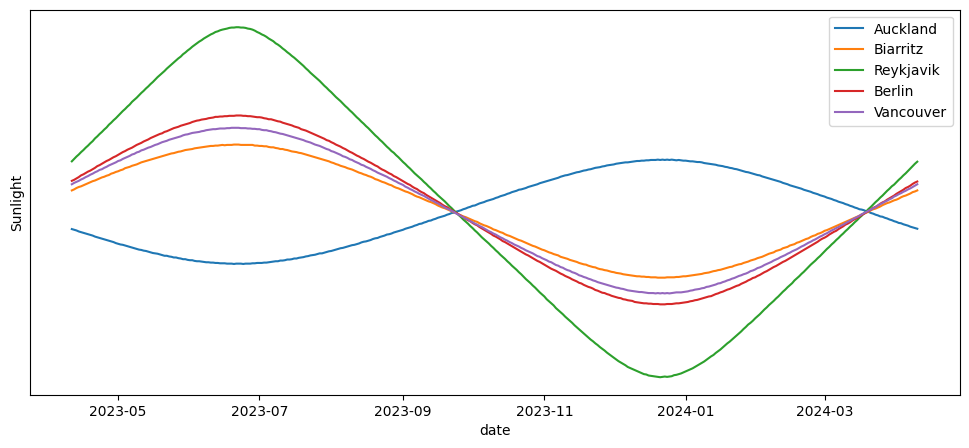

In [13]:
plt.figure(figsize=(12,5)) 

sns.lineplot(x='date', y='Auckland', data = sunlight, label='Auckland')
sns.lineplot(x='date', y='Biarritz', data = sunlight, label='Biarritz')
sns.lineplot(x='date', y='Reykjavik', data = sunlight, label='Reykjavik')
sns.lineplot(x='date', y='Berlin', data = sunlight, label='Berlin')
sns.lineplot(x='date', y='Vancouver', data = sunlight, label='Vancouver')
plt.ylabel('Sunlight')
plt.yticks([])

plt.legend();